## Sampling

In [ ]:
import librosa
from IPython.display import Audio

Lets import a song


In [ ]:
data_original_rs, sampling_rate_original = librosa.load("drive/MyDrive/Colab Notebooks/archive/a day in the life 44100.wav")

Now, lets check the number of samples and the sample rate

In [ ]:
f"The number of samples are {len(data_original_rs)}, the sample rate is {sampling_rate_original}"

'The number of samples are 661596, the sample rate is 22050'

So, we can actually calculate the length of the song

In [ ]:
f"The seconds recorded are: {661596/22050}"

'The seconds recorded are: 30.004353741496598'

In [ ]:
Audio(data=data_original_rs, rate=sampling_rate_original)

Now lets take a lower sample version

In [ ]:
data_lower_rs, sampling_rate_lower = librosa.load("drive/MyDrive/Colab Notebooks/archive/a day in the life 1000.wav")

In [ ]:
f"The number of samples are {len(data_lower_rs)}, the sample rate is {sampling_rate_lower}"

'The number of samples are 661588, the sample rate is 22050'

In [ ]:
f"The seconds recorded are: {661588/22050}"

'The seconds recorded are: 30.003990929705214'

In [ ]:
Audio(data=data_lower_rs,rate=sampling_rate_lower)

Let's compare both signals to find some aliasing

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data_original_rs, color='r',alpha=0.5)
librosa.display.waveshow(data_lower_rs,color='b',alpha=0.5)
plt.show()

NameError: ignored

<Figure size 1200x400 with 0 Axes>

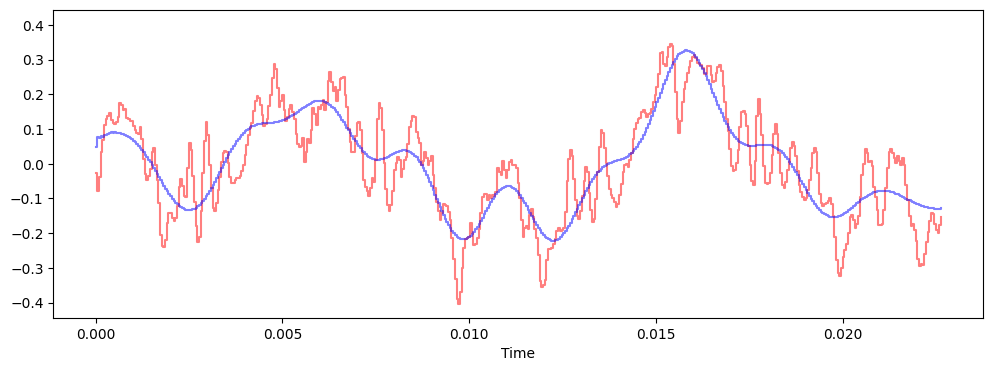

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data_original_rs[:500], color='r',alpha=0.5)
librosa.display.waveshow(data_lower_rs[:500],color='b',alpha=0.5)
plt.show()

## Exercise

In [ ]:
def get_sample_rate(frequency,duration):
  y =  librosa.tone(frequency, duration=duration)
  return y ,len(y)/duration,frequency*2

In [ ]:
data, sample_rate, nyquist_frequency = get_sample_rate(400,10)
f"The sample rate is :{sample_rate} hz and the Nyquist frequency we should use must be at least {nyquist_frequency} hz"

'The sample rate is :22050.0 hz and the Nyquist frequency we should use must be at least 800 hz'

In [ ]:
import numpy as np
new_signal = []
for i,y in enumerate(data):
  if i%2==0:
    new_signal.append(y)

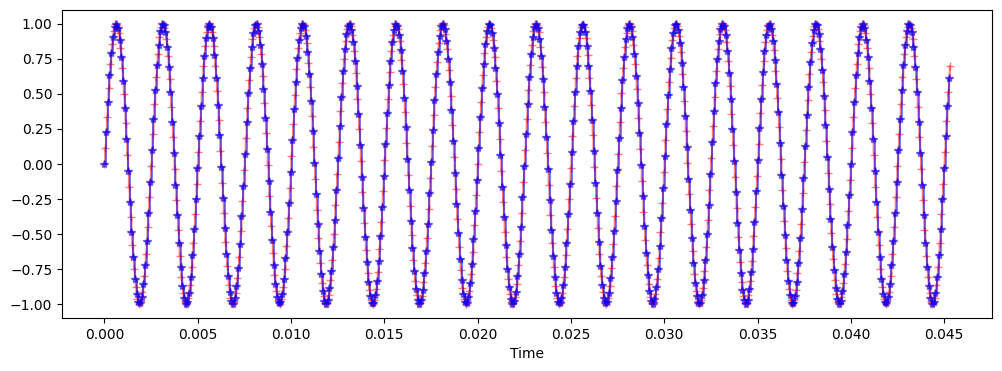

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data[:1000], color='r',alpha=0.5,marker="+",sr=22050)
librosa.display.waveshow(np.array(new_signal)[:500], color='b',alpha=0.5,sr=11025,marker="*")
plt.show()

In [ ]:
fixed_signal = []
for i,y in enumerate(new_signal):
    previous_value =(new_signal[i]+new_signal[i-1])/2
    fixed_signal.append(previous_value)
    fixed_signal.append(y)


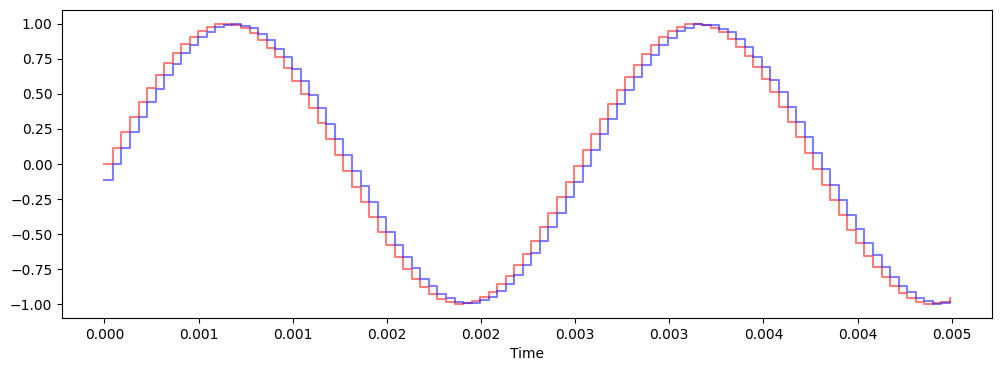

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data[:100], color='r',alpha=0.5)
librosa.display.waveshow(np.array(fixed_signal)[:100], color='b',alpha=0.5)
plt.show()

In [ ]:
xp = [i for i,y in enumerate(new_signal)]
x = [i+0.5 for i,y in enumerate(new_signal)]
missing_signal_inter = np.interp(x, xp, new_signal)
fix_signal_inter =  np.ravel([new_signal,missing_signal_inter],'F')

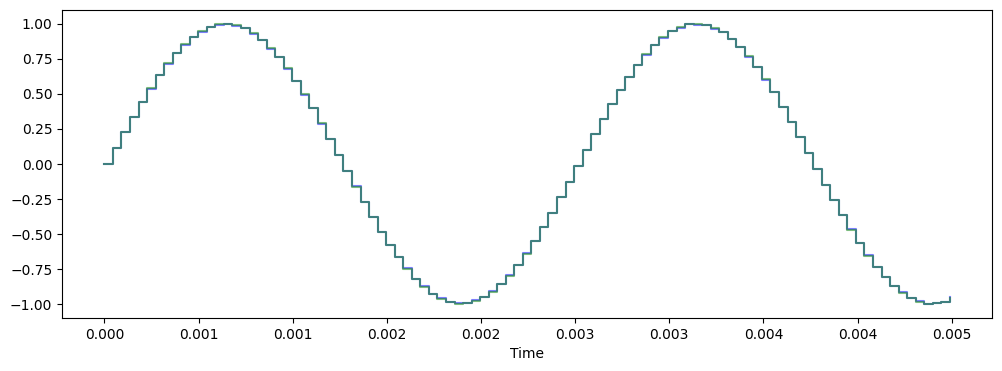

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(fix_signal_inter[:100], color='b',alpha=0.5)
librosa.display.waveshow(data[:100], color='g',alpha=0.5)
plt.show()